## Random math comprehension question generator

Function to generate math comprehension problems and create to the named CSV file. A random template is selected, random numbers are inserted, and answers are determined based on keywords, with all numerical solutions converted into words. This function is adjustable to create n number of results, with the current question-answer generation threshold set to 4000.

In [ ]:
import random
import csv
import inflect

# Initialize the inflect engine to convert numbers into words
p = inflect.engine()

def generate_random_math_word_question():
    """
    Generates a random math word problem with a corresponding solution.
    Returns:
        tuple: A tuple containing the question (str) and the answer (str in word format with hyphens).
    """
    # Define a list of question templates
    templates = [
        "If {num1} apples are added to {num2} apples - how many apples are there in total?",
        "A train travels {num1} miles in the morning and {num2} miles in the evening - What is the total distance travelled?",
        "There are {num1} pencils in one box and {num2} pencils in another box - How many pencils are there altogether?",
        "If a shop sells {num1} toys on Monday and {num2} toys on Tuesday - how many toys were sold in total?",
        "Sam has {num1} marbles and he loses {num2} marbles - How many marbles does Sam have left?",
        "A baker has {num1} muffins and bakes {num2} more muffins - How many muffins does the baker have now?",
    ]

    # Randomly choose a template from the list
    template = random.choice(templates)
    # Generate two random numbers between 1 and 20
    num1 = random.randint(1, 20)
    num2 = random.randint(1, 20)
    # Format the chosen template with the random numbers
    question = template.format(num1=num1, num2=num2)
    # Determine the answer based on keywords in the question
    if "apples" in question or "train" in question or "pencils" in question or "bakes" in question or "total distance" in question or "shop" in question or "sells" in question:
        answer = num1 + num2  # Perform addition for these keywords
    elif "loses" in question or "sam" in question:
        answer = num1 - num2  # Perform subtraction for these keywords
    else:
        answer = "Logic depends on question wording"  # Handle edge cases or undefined scenarios
    # Convert the numeric answer into words with hyphens
    answer_word = p.number_to_words(answer).replace(" ", "-") if isinstance(answer, int) else answer

    return question, answer_word

def create_csv_with_questions(file_name, num_records):
    """
    Generates a specified number of math word questions and saves them to a CSV file.
    Args:
        file_name (str): Name of the CSV file to save the records.
        num_records (int): Number of math word problems to generate.
    """
    # Open the CSV file for writing (creating or overwriting the file)
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)  # Create a CSV writer object
        # Write the header row to the CSV file
        writer.writerow(["Question", "Answer"])
        # Generate and write the specified number of records
        for _ in range(num_records):
            question, answer = generate_random_math_word_question()
            writer.writerow([question, answer])  # Write each question-answer pair to the file
    # Print a success message after creating the CSV file
    print(f"Successfully created {num_records} records in '{file_name}'.")
# Example: Generate 2000 records and save them to the file math_word_problems.csv
create_csv_with_questions("math_word_problems.csv", 4000)

Successfully created 2000 records in 'test_math_word_problems.csv'.


## Peform sequence length checks

Analyzes the word count of questions and answers in our dataset of math word problems, providing insights into their complexity. After loading the dataset from a CSV file using pandas, we calculates the length of each question and answer by counting the number of words. We then computes basic statistics, such as the average, maximum, and minimum lengths for both questions and answers. Finally, we utilise matplotlib to create histograms that visually display the frequency distribution of these word counts.

Average Question Length: 19.06 words
Max Question Length: 21 words
Min Question Length: 16 words
Average Answer Length: 1.00 words
Max Answer Length: 1 words
Min Answer Length: 1 words


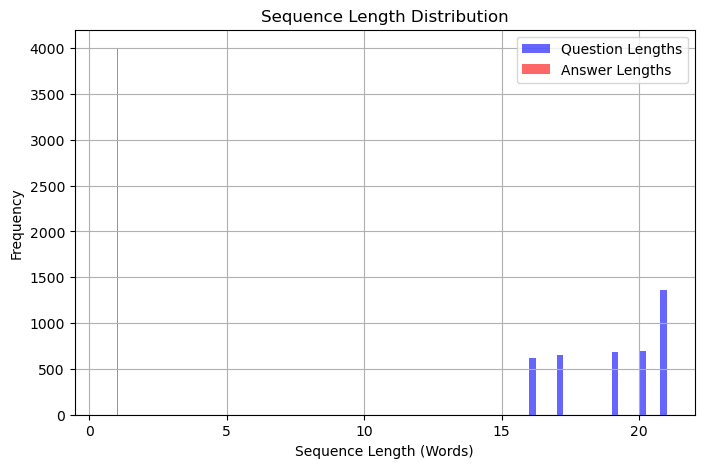

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from CSV
file_name = "math_word_problems.csv"
df = pd.read_csv(file_name)
# Compute sequence lengths
question_lengths = df["Question"].apply(lambda x: len(x.split()))
answer_lengths = df["Answer"].apply(lambda x: len(x.split()))
# Compute basic statistics
print(f"Average Question Length: {question_lengths.mean():.2f} words")
print(f"Max Question Length: {question_lengths.max()} words")
print(f"Min Question Length: {question_lengths.min()} words")
print(f"Average Answer Length: {answer_lengths.mean():.2f} words")
print(f"Max Answer Length: {answer_lengths.max()} words")
print(f"Min Answer Length: {answer_lengths.min()} words")
# Plot histogram of sequence lengths
plt.figure(figsize=(8, 5))
plt.hist(question_lengths, bins=20, alpha=0.6, color='blue', label="Question Lengths")
plt.hist(answer_lengths, bins=20, alpha=0.6, color='red', label="Answer Lengths")
plt.xlabel("Sequence Length (Words)")
plt.ylabel("Frequency")
plt.title("Sequence Length Distribution")
plt.legend()
plt.grid()
# Show the plot
plt.show()

## Perform Bigram (two-word phrase) frequency analysis

Analyzes our dataset of math word problems to identify and visualize the most frequently occurring two-word combinations (bigrams) in the text. It loads the dataset using pandas, and tokenizes the text from the "Question" and "Answer" columns into lowercase word tokens, generating bigrams by pairing consecutive words. It then computes the frequency of each bigram and extracts the top 20 most common. These bigrams and their frequencies are displayed in the console and visualized as a bar chart using matplotlib.

Top 20 Most Frequent Bigrams:
- how: 3334
how many: 3334
toys on: 1386
pencils in: 1384
miles in: 1332
in the: 1332
in total?: 1309
are there: 1308
apples are: 1232
if a: 693
a shop: 693
shop sells: 693
on monday: 693
monday and: 693
on tuesday: 693
tuesday -: 693
many toys: 693
toys were: 693
were sold: 693
sold in: 693


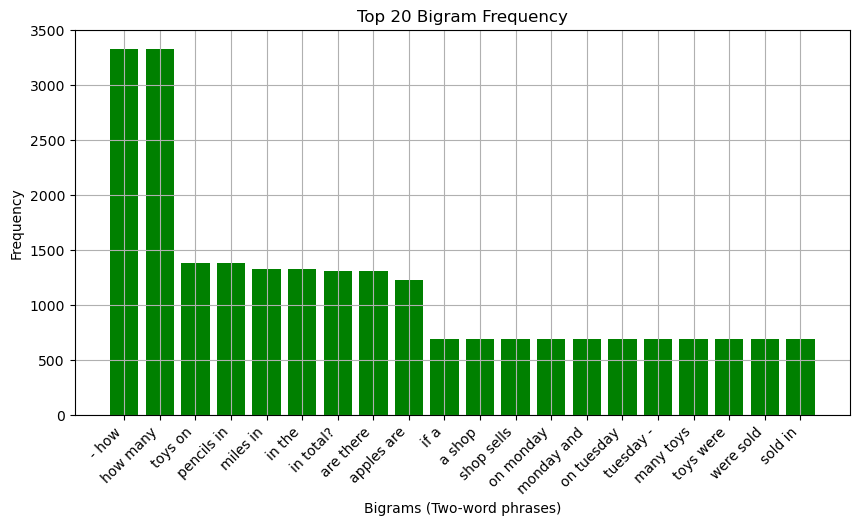

In [5]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
from itertools import islice

# Load the dataset from CSV
file_name = "math_word_problems.csv"
df = pd.read_csv(file_name)
# Tokenize questions and answers by splitting into words
tokens = []
for text in df["Question"].tolist() + df["Answer"].tolist():
    tokens.extend(text.lower().split())  # Convert to lowercase for uniformity
# Generate bigram pairs (two consecutive words)
bigrams = [" ".join(pair) for pair in zip(tokens, islice(tokens, 1, None))]
# Compute frequency of each bigram
bigram_counts = collections.Counter(bigrams)
# Get the most common bigrams
most_common_bigrams = bigram_counts.most_common(20)  # Top 20 bigrams
# Print the most frequent bigrams
print("Top 20 Most Frequent Bigrams:")
for bigram, count in most_common_bigrams:
    print(f"{bigram}: {count}")
# Visualize bigram frequency distribution
plt.figure(figsize=(10, 5))
plt.bar([bigram for bigram, _ in most_common_bigrams], [count for _, count in most_common_bigrams], color="green")
plt.xlabel("Bigrams (Two-word phrases)")
plt.ylabel("Frequency")
plt.title("Top 20 Bigram Frequency")
plt.xticks(rotation=45, ha="right")
plt.grid()
# Show the plot
plt.show()